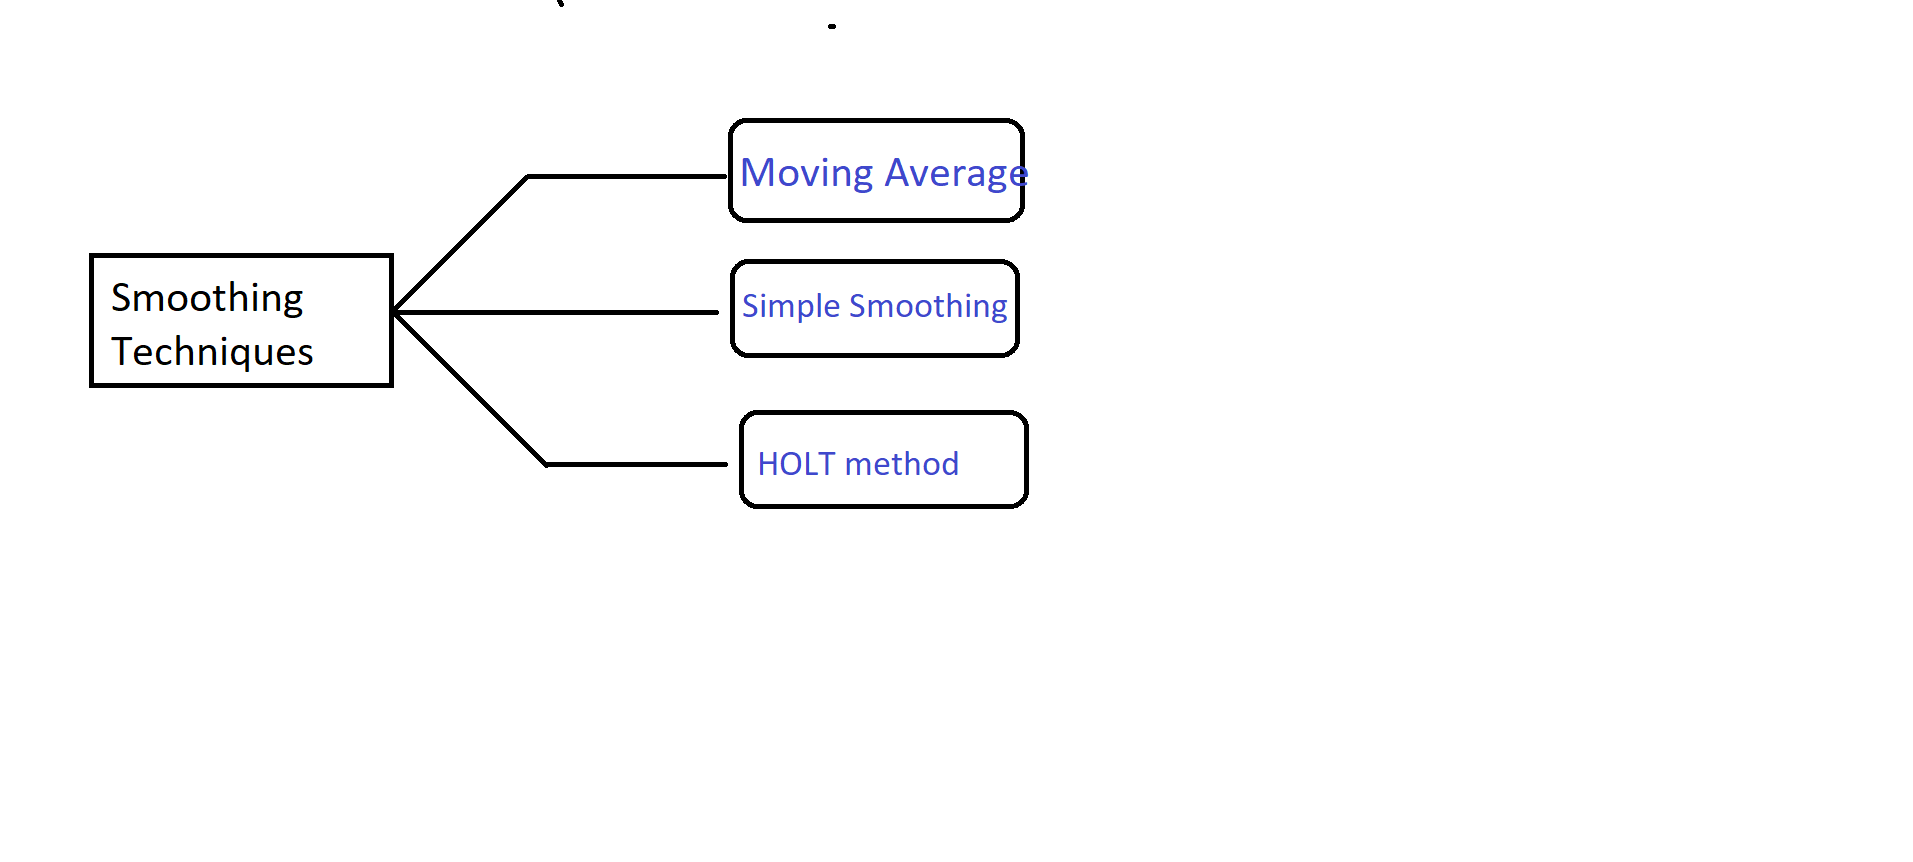

In [1]:
from IPython.display import Image
Image('C:\\Users\\120761\\Pictures\\Screenshots\\SmoothingTechniques.png')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from matplotlib import pyplot


In [3]:
data=pd.read_csv('C:/Users/120761/Documents/PyScripts/Trendstimeseries.csv',header=0,index_col=0)

In [4]:
data.shape

(30, 1)

In [5]:
data.head()

,Orders
Date,
2019-1,112
2019-2,109
2019-3,230
2019-4,469
2019-5,5532


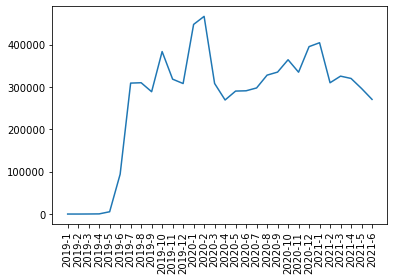

In [6]:
plt.plot(data[0:30]['Orders'])
plt.xticks(rotation=90)
plt.show()

In [7]:
#Taking Rolling average

rollingseries=data[1:30].rolling(window=3)

rollingavg=rollingseries.mean()

print(rollingavg.head(20))

                Orders
Date                  
2019-2             NaN
2019-3             NaN
2019-4      269.333333
2019-5     2077.000000
2019-6    33376.666667
2019-7   136297.333333
2019-8   237825.666667
2019-9   302744.000000
2019-10  327561.666667
2019-11  330361.666667
2019-12  336809.000000
2020-1   358176.333333
2020-2   407602.000000
2020-3   407654.000000
2020-4   348187.666667
2020-5   289390.333333
2020-6   283626.333333
2020-7   293097.000000
2020-8   305646.000000
2020-9   320358.000000


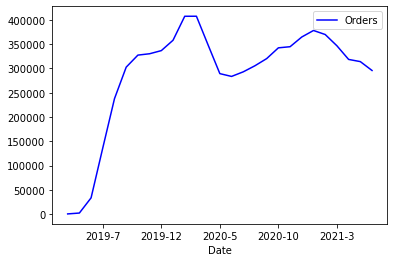

In [8]:
#plotting graph after finding the Rolling average:

rollingavg.plot(color='blue')
pyplot.show()


# Simple Exponential Smoothing

In [20]:
data=data[0:20]
fit1=SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)

fit2=SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

C:\Users\120761\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\120761\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


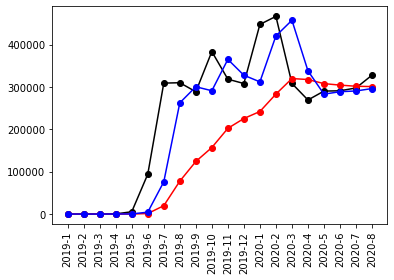

In [21]:
plt.plot(data[0:20],marker='o',color='black')
plt.xticks(rotation=90)

plt.plot(fit1.fittedvalues,marker='o',color='red')
plt.plot(fit2.fittedvalues,marker='o',color='blue')


# HOLT Method

In [22]:
fit1=Holt(data).fit()

fit2=Holt(data,exponential=True).fit()

C:\Users\120761\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\120761\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\120761\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\120761\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


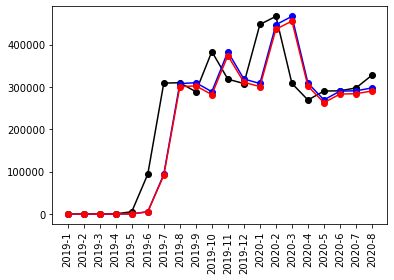

In [23]:
plt.plot(data,marker='o',color='black')
plt.xticks(rotation=90)

plt.plot(fit1.fittedvalues,marker='o',color='blue')
plt.plot(fit2.fittedvalues,marker='o',color='red')


# Decomposition & Checking the Data Whether it is Stationary or Not

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [34]:
dataa=pd.read_csv('C:/Users/120761/Documents/PyScripts/Trendstimeseries.csv',parse_dates=['Date'],index_col='Date')

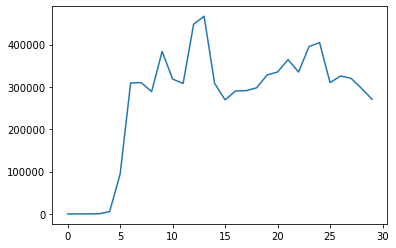

In [41]:
plt.plot(dataa['Orders'])

In [ ]:
# This above data looks like trend category , it is not more seasonal

In [45]:
#Additive Decomposition
add_result = seasonal_decompose(dataa['Orders'],model='additive',period=1)

#Additive Decomposition
multiplicate_result = seasonal_decompose(dataa['Orders'],model='multiplicative',period=1)


Text(0.5, 0.98, '\n multiplicative decompose')

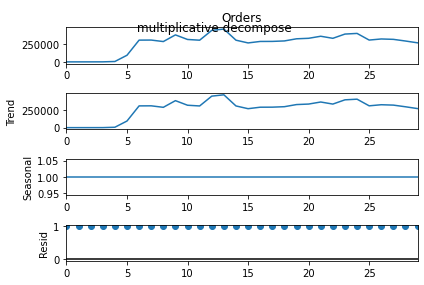

In [52]:
#plotting Multiplicative result
multiplicate_result.plot().suptitle('\n multiplicative decompose',fontsize=12)

Text(0.5, 0.98, '\n additive decompose')

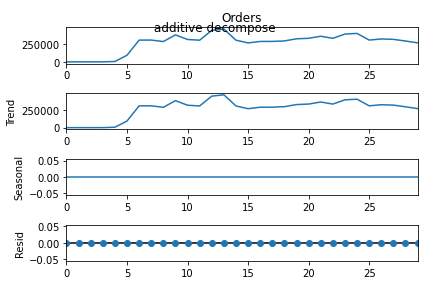

In [53]:
add_result.plot().suptitle('\n additive decompose',fontsize=12)

In [ ]:
#to know the actual value to compare the Trend/Seasonal/Resid value we need to add all the values of add_result
#because this is "additive decompose"

dataa_df_add=pd.concat([add_result.seasonal,add_result.trend,add_result.resid,add_result.observed],axis=1)
dataa_df_add_col=['Seasonal value','Trend value','Resid value','actual value']
dataa_df_add.head(5)


In [58]:

#to know the actual value to compare the Trend/Seasonal/Resid value we need to multiply all the values of multi_result
#because this is "Multiplicative decompose"


dataa_df_multi=pd.concat([multiplicate_result.seasonal,multiplicate_result.trend,multiplicate_result.resid,multiplicate_result.observed],axis=1)
dataa_df_multi_col=['Seasonal value','Trend value','Resid value','actual value']
dataa_df_multi.head(5)


,seasonal,trend,resid,Orders
0,1.0,112.0,1.0,112.0
1,1.0,109.0,1.0,109.0
2,1.0,230.0,1.0,230.0
3,1.0,469.0,1.0,469.0
4,1.0,5532.0,1.0,5532.0


# ADF Fuller Test for STATIONARY check

# If the Data is stationary means the Mean & Variance values should need to be constant

In [61]:

from statsmodels.tsa.stattools import adfuller

In [69]:
#ADF test-Null hypothesis -non stationary --> if p-values is <5% we need to reject hypothesis

adfuller_test=adfuller(data.Orders.values,autolag='AIC')
print('adf statistics',adfuller_test[0])
print('p-val',adfuller_test[1])

adf statistics -3.257638914158394
p-val 0.01688151481755424


In [ ]:
So now we got p value as 1% ....we need to reject hypothesis. So the data is stationary.

# Autoregressive with ACF & PACF

#we will discuss the Lagged series
#Autoreggrsive , ACF & PACF



In [ ]:
'''Time Series example Lag :
    
    Original time series = {21,22,21,20,19}
    Lagged time series by 1 = {22,21,20,19}
    if it is time series lag by 2 means ={20,19}
    
because the data in the 1st value will be skipped in the Lagged time series
'''
##############################################################################################################
'''
ACF>>> give the correlation of any series with its lagged values

PACF >>> An indirect function to find the autocorrelation when ther is no relation even.'''

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid',color_codes=True)
from statsmodels.tsa.stattools import acf,pacf

In [71]:
axisline = np.linspace(0,10,500)

#normall distributed values
normalpoints=np.random.normal(0,5,500)

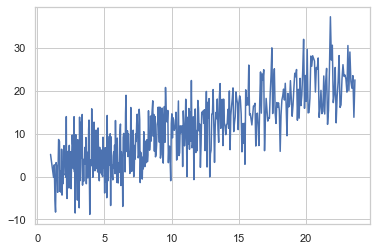

In [75]:
#xpoential series to get the trend

ExponentialData= np.exp(axisline**0.5)
y=normalpoints+ExponentialData

plt.plot(ExponentialData,y)

In [76]:
#calling Autocorrelation function

ACF_lag=acf(y,nlags=200)

C:\Users\120761\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


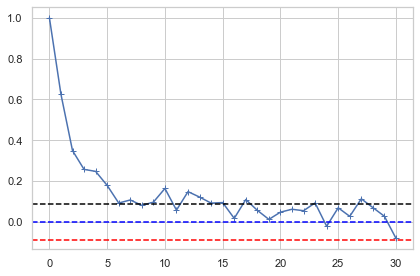

In [80]:
#calling Partial Auto corelatin PACF

Pacf_lags= pacf(y,nlags=30,method='ols')


plt.plot(Pacf_lags,marker='+')
plt.axhline(y=0,linestyle='--',color='blue')
plt.axhline(y=-1.96/np.sqrt(len((y))),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len((y))),linestyle='--',color='black')

plt.tight_layout()
            